In [8]:
## Advanced Course in Machine Learning
## Week 6
## Exercise 2 / Random forest

import numpy as np
import scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from numpy import linalg as LA
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE
import math
import sys

import mnist
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

sns.set_style("darkgrid")

In [4]:
x_train, t_train, x_test, t_test = mnist.load()

In [48]:
x_train = x_train[0:50000,:]
t_train = t_train[0:50000]

In [49]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(50000, 784)
(50000,)
(10000, 784)
(10000,)


In [69]:
startTestIx = 0
endTestIx = 100

clf.classes_
clf.feature_importances_
print(clf.max_features_)
print(clf.n_classes_)
print(clf.n_features_)
print(clf.n_outputs_)
#clf.tree_

In [70]:
# Randomly select the samples and features for the tree
def sample(n, k, x_train, t_train):
    idx = np.random.randint(x_train.shape[0], size=n)
    fidx = np.random.randint(x_train.shape[1], size=k)
    x = x_train[idx, :]
    x = x[:, fidx]
    y = t_train[idx]
    return x, y, idx, fidx
    #print("Rows: ", idx, ", features ", fidx)
    #print(x.shape)
    #print(y.shape)

In [71]:
def trainTree(x_train, t_train):
    clf = DecisionTreeClassifier(random_state=0)
    clf = clf.fit(x_train, t_train)
    return clf

#cross_val_score(clf, x_train, t_train, cv=10)

In [72]:
def ensureAllClasses(newPred, clf):
    for i in range(10):
        if i not in clf.classes_:
            newPred = np.insert(newPred, i, 0, axis=1)
    return newPred

In [75]:
# Main loop
def main(M, n, k):
    pred = np.zeros(shape = (endTestIx - startTestIx, 10), dtype = 'float32')
    for m in range(M):
        x, y, idx, fidx = sample(n, k, x_train, t_train)
        clf = trainTree(x, y)
        newPred = clf.predict_proba(x_test[startTestIx:endTestIx,fidx])
        newPred = ensureAllClasses(newPred, clf)
        pred = np.add(pred, newPred)

    pred_classes = np.argmax(pred, axis=1)

    correct = pred_classes == t_test[startTestIx:endTestIx]
    acc = sum(correct)/len(correct)
    #print(pred_classes)
    #print (acc)
    return acc

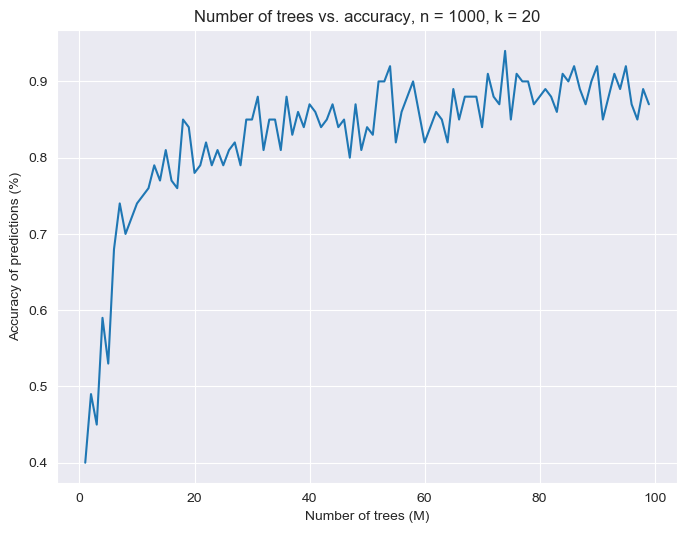

In [85]:
Mmax = 100
n = 1000
k = 20
accs = list()
for m in range(1, Mmax):
    accs.append(main(m, n, k))

plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
sns.lineplot(range(1,Mmax), accs)
plt.xlabel('Number of trees (M)')
plt.ylabel('Accuracy of predictions (%)')
plt.title('Number of trees vs. accuracy, n = {0}, k = {1}'.format(n, k))
plt.show()

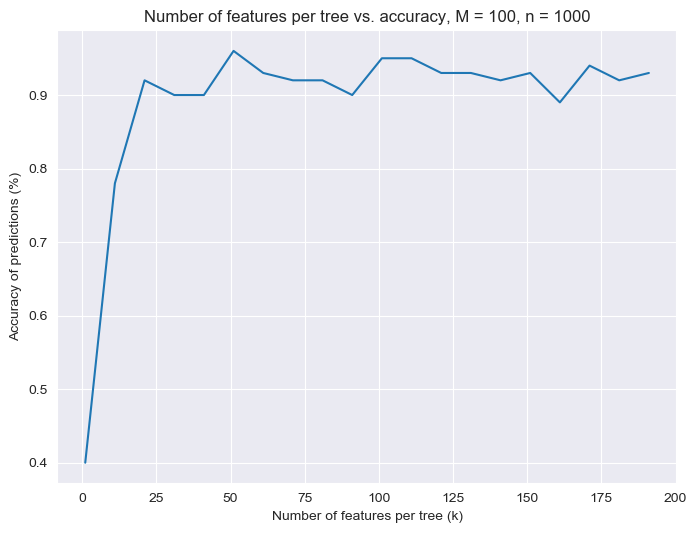

In [80]:
M = 100
n = 1000
kmax = 200
accs = list()
for k in range(1, kmax, 10):
    accs.append(main(M, n, k))

plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
sns.lineplot(range(1,kmax,10), accs)
plt.xlabel('Number of features per tree (k)')
plt.ylabel('Accuracy of predictions (%)')
plt.title('Number of features per tree vs. accuracy, M = {0}, n = {1}'.format(M, n))
plt.show()

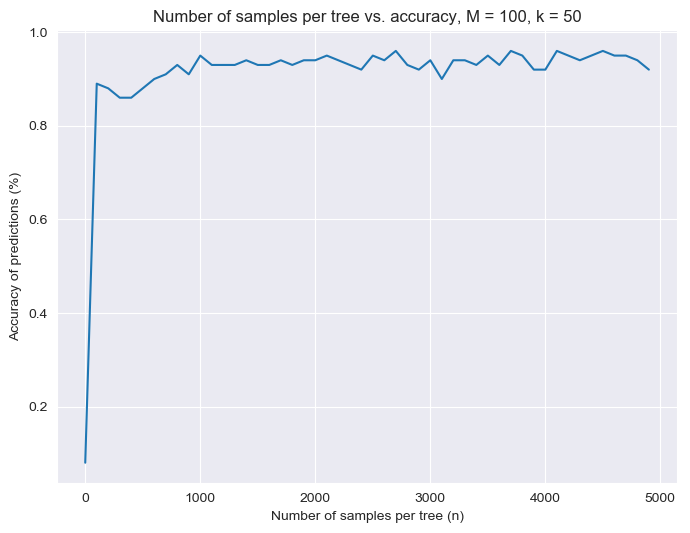

In [81]:
M = 100
nmax = 5000
k = 50
accs = list()
for n in range(1, nmax, 100):
    accs.append(main(M, n, k))

plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
sns.lineplot(range(1, nmax, 100), accs)
plt.xlabel('Number of samples per tree (n)')
plt.ylabel('Accuracy of predictions (%)')
plt.title('Number of samples per tree vs. accuracy, M = {0}, k = {1}'.format(M, k))
plt.show()

In [84]:
M = 100
n = 1000
k = 50

repeats = 50

accs = list()
for i in range(50):
    accs.append(main(M, n, k))

avAcc = sum(accs)/len(accs)
print(avAcc)

0.9221999999999996
